In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm

import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict

In [2]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_77614/4220488969.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)           

In [4]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

In [103]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table
from scipy.stats import spearmanr#
from scipy.stats import pearsonr

from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)


from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
import time
from time import strftime,strptime
import calendar
from dateutil.parser import parse

#from adjustText import adjust_text
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
from collections import OrderedDict
#from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [102]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# GRS1915_FAST_QPO_data

In [5]:
GRS1915_FAST_QPO_data=pd.read_csv('/Users/lyubing/Downloads/GRS1915/lightcurvedata—GRS1915.csv',header=None)

In [6]:
GRS1915_FAST_QPO_data.columns=['mjd','flux','err']

In [7]:
(GRS1915_FAST_QPO_data['mjd'][1]-GRS1915_FAST_QPO_data['mjd'][0])*24*3600

0.0015728641301393509

In [12]:
datadir_root='/Users/lyubing/Downloads/GRS1915'

#mkdir /Users/lyubing/Downloads/GRS1915

file_path='/Users/lyubing/Downloads/GRS1915/lightcurvedata—GRS1915.csv'

os.path.basename(file_path)

'lightcurvedata—GRS1915.csv'

In [30]:
GRS1915_FAST_QPO_data['s']=GRS1915_FAST_QPO_data['mjd']*24*3600

In [9]:
1/0.00157

636.9426751592357

In [ ]:
0.001

In [11]:
0.0015*100

0.15

In [ ]:
GRS1915_FAST_QPO_data['mjd'][1]

time, magnitude, magnitude_error= np.loadtxt('/Users/lyubing/Downloads/GRS1915/lightcurvedata—GRS1915.csv',dtype=float,unpack=True)

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0., wspace = 0.0)
ax = fig.add_subplot(1,1,1)

xlabel='mjd'
ylabel='flux'
xerr_label=''
yerr_label='err'
color_label='black'
colorval='black'

#dataplot=slab_zgauss_result
#ax=plot_errorbar_cmap(ax,dataplot,xlabel,ylabel,xerr=xerr_label,yerr=yerr_label,color_n=color_label,marker_n='name',size_n=None,logx=False,logy=False)
dataplot=GRS1915_FAST_QPO_data[:64]

ax.errorbar( x=dataplot[xlabel],
             y=dataplot[ylabel],
             yerr=dataplot[yerr_label], 
              marker='.',
              markersize=11, color=colorval,mec=colorval,ecolor=colorval,
              elinewidth=2,ls='',fillstyle='none',
           )

set_ax_tick(ax)

# stingray

In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

In [18]:
# load auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# import stingray
import stingray

plt.style.use('seaborn-talk')

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_77614/3129187627.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


lc = stingray.Lightcurve.make_lightcurve(toa=toa, dt=dt)

In [ ]:
starting on 25 January 2021
01:35:00 (UTC) with a 49.152-μs sample time

In [ ]:
from 01:25:00 to 01:30:00 (UTC) and from 03:10:00 to 03:15:00 (UTC),

In [ ]:
16 June 2022 from 17:42:40 (UTC) to 17:47:30 (UTC) 

In [105]:
time=datetime(2021,1,25,1,35,0)
convert_xaxis_mjd(time)

59239.06597222222

In [106]:
time=datetime(2021,1,25,3,10,0)
convert_xaxis_mjd(time)

59239.131944444445

In [110]:
min(GRS1915_FAST_QPO_data['mjd']),max(GRS1915_FAST_QPO_data['mjd'])

(59239.06597224042, 59239.12844199303)

In [107]:
dataplot= GRS1915_FAST_QPO_data[GRS1915_FAST_QPO_data['mjd']>59239.06597222222]
dataplot=dataplot[dataplot['mjd']<59239.131944444445]

In [108]:
dataplot

mjd      flux       err             s
0        59239.065972  0.386816  0.003531  5.118255e+09
1        59239.065972  0.386657  0.003529  5.118255e+09
2        59239.065972  0.386714  0.003530  5.118255e+09
3        59239.065972  0.387692  0.003539  5.118255e+09
4        59239.065972  0.388024  0.003542  5.118255e+09
...               ...       ...       ...           ...
3431560  59239.128442  0.627463  0.002797  5.118261e+09
3431561  59239.128442  0.627760  0.002798  5.118261e+09
3431562  59239.128442  0.626996  0.002794  5.118261e+09
3431563  59239.128442  0.626433  0.002792  5.118261e+09
3431564  59239.128442  0.626276  0.002791  5.118261e+09

[3431565 rows x 4 columns]

In [76]:
dataplot=GRS1915_FAST_QPO_data[:2**10]
dt=dataplot['mjd'][1]-dataplot['mjd'][0]

In [98]:
(dataplot['mjd'][2]-dataplot['mjd'][1])*24*3600

0.0015728641301393509

In [97]:
dt*24*3600

0.0015728641301393509

In [68]:
dataplot['mjd'][0]

59239.06597224042

In [94]:
lc = Lightcurve(np.array(dataplot['mjd']), np.array(dataplot['flux']), dt=0.02, skip_checks=True)

In [78]:
lcs = Lightcurve(np.array(dataplot['s']), np.array(dataplot['flux']), dt=dt*24*3600, skip_checks=True)

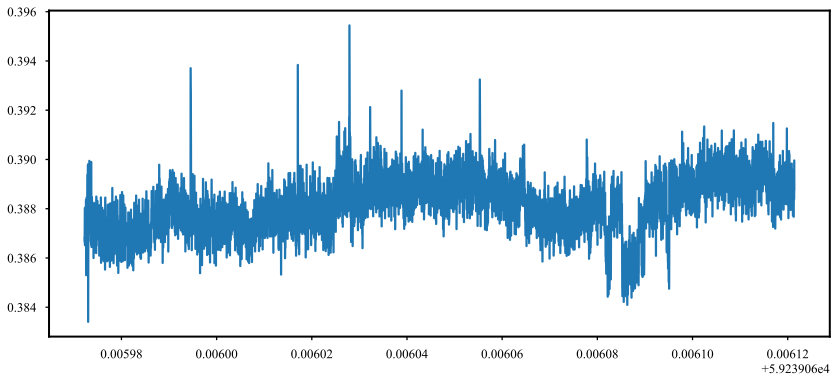

In [95]:
lc.plot()

lcs.plot()

stingray.Lightcurve.make_lightcurve?

In [96]:
ps = Powerspectrum.from_lightcurve(lc, ) #norm="leahy",gti=None
print(ps)

AssertionError: No GTIs are equal to or longer than segment_size.

In [ ]:
#ps = Powerspectrum(lc, norm="leahy")

NameError: name 'ps' is not defined

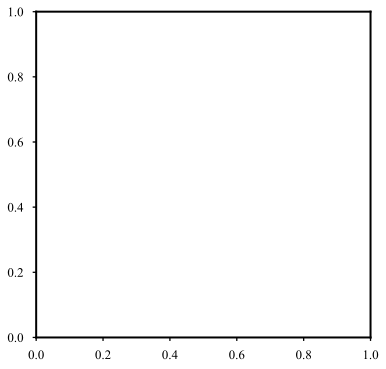

In [75]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6), sharex=True)
ax1.plot(ps.freq, ps.power, lw=2, color='blue')
ax1.set_ylabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power (raw)", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
plt.show()

In [86]:
dataplot=GRS1915_FAST_QPO_data[:2**13]
dt=dataplot['mjd'][1]-dataplot['mjd'][0]

long_lc = Lightcurve(np.array(dataplot['mjd']), np.array(dataplot['flux']), dt=dt) #, skip_checks=True

#avg_ps = AveragedPowerspectrum.from_lightcurve(long_lc, 8., norm="lf")

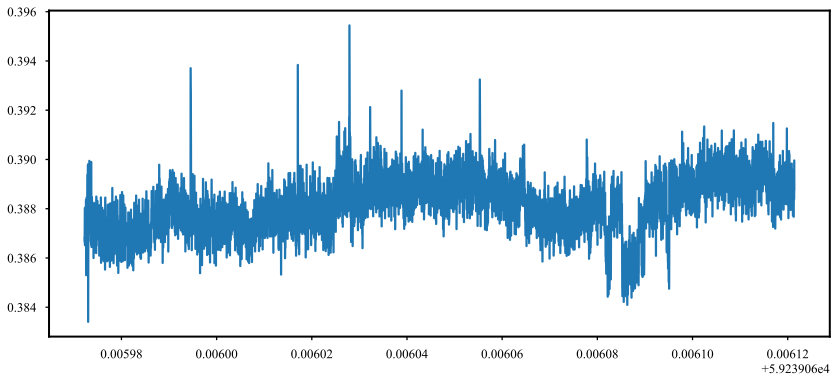

In [87]:
long_lc.plot()

# libWWZ

## example

"""
This module provides examples demonstrating the WWZ by looking at a simple signal (2 Hz).

Please select whether to run in parallel or not.
There are 'linear' method and 'octave' method.
current example showcases both methods

NOTE: The WWZ shows better information on frequency and WWA shows better information on amplitude.
"""

import time

#noinspection Mypy
import matplotlib.pyplot as plt
#noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot

#Select Mode...
parallel = True

#number of time
ntau = 20  # Creates new time with this many divisions.

#linear
freq_low = 1
freq_high = 5
freq_steps = 0.2  # Resolution of frequency steps
freq_lin = [freq_low, freq_high, freq_steps]

#octave
freq_target = 2
freq_low = 0.5
freq_high = 6.5
band_order = 3
log_scale_base = 10**(3/10)
override = False
freq_oct = [freq_target, freq_low, freq_high, band_order, log_scale_base, override]

#decay constant  (c < 0.02) where c = 1/(2*w^2)
#The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 2
w = 2 * np.pi * f
c = 1/(2*w**2)

#Code to remove data points at random

def remove_fraction_with_seed(data, fraction, seed=np.random.randint(1)):
    """
    removes fraction of data at random with given seed.
    :param data: data to remove
    :param fraction: fraction to remove
    :param seed: seed for randomness
    :return: data with fraction removed
    """
    n_to_remove = int(len(data) * fraction)
    np.random.seed(seed)

    return np.delete(data, np.random.choice(np.arange(len(data)), n_to_remove, replace=False))


def run_examples() -> None:
    """
    An example of WWZ/WWA using a sine function time series with missing data will be shown.
    """

    # Set timestamps
    sample_freq = 80
    timestamp = np.arange(0, 60, 1 / sample_freq)

    # Create simple signal (2hz)
    sine_2hz = np.sin(timestamp * 2 * (2 * np.pi))
    simple_signal = sine_2hz

    # Remove 80% of the signal at random
    simple_removed = remove_fraction_with_seed(simple_signal, 0.8)
    timestamp_removed = remove_fraction_with_seed(timestamp, 0.8)

    # Get the WWZ/WWA of the signals (linear)
    # 'linear'
    starttime = time.time()
    WWZ_simple_linear = wwz.wwt(timestamp, simple_signal, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_linear)')
    WWZ_simple_removed_linear = wwz.wwt(timestamp_removed, simple_removed, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_removed_linear)')

    # 'octave'
    WWZ_simple_octave = wwz.wwt(timestamp, simple_signal, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_octave)')
    WWZ_simple_removed_octave = wwz.wwt(timestamp_removed, simple_removed, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_removed_octave)')

    # Plot
    plt.rcParams["figure.figsize"] = [14, 6]
    plt.rcParams.update({'font.size': 14})

    # Plot of base functions
    plt.figure(0)
    plt.plot(timestamp, simple_signal, '-')
    plt.plot(timestamp_removed, simple_removed, 'o')
    plt.ylabel("simple (count)")
    plt.legend(['full', 'removed'], loc=1, fontsize=10)
    plt.xlabel("time (s)")
    plt.suptitle('The simple signal (2 Hz)')

    # Plot of WWZ for simple and simple removed
    # 'linear'
    fig, ax = plt.subplots(nrows=2, ncols=2)
    wwz_plot.linear_plotter(ax=ax[0, 0],
                            TAU=WWZ_simple_linear[0],
                            FREQ=WWZ_simple_linear[1],
                            DATA=WWZ_simple_linear[2])
    ax[0, 0].set_ylabel('full data (Hz)')
    ax[0, 0].set_xticks([])
    ax[0, 0].set_yticks([1, 2, 3, 4, 5])
    ax[0, 0].set_title('WWZ')

    wwz_plot.linear_plotter(ax=ax[1, 0],
                            TAU=WWZ_simple_removed_linear[0],
                            FREQ=WWZ_simple_removed_linear[1],
                            DATA=WWZ_simple_removed_linear[2])
    ax[1, 0].set_ylabel('removed data (Hz)')
    ax[1, 0].set_xlabel('time (s)')
    ax[1, 0].set_yticks([1, 2, 3, 4, 5])

    # Plot of WWA for the same signal
    wwz_plot.linear_plotter(ax=ax[0, 1],
                            TAU=WWZ_simple_linear[0],
                            FREQ=WWZ_simple_linear[1],
                            DATA=WWZ_simple_linear[3])
    ax[0, 1].set_title('WWA')
    ax[0, 1].set_xticks([])
    ax[0, 1].set_yticks([])

    wwz_plot.linear_plotter(ax=ax[1, 1],
                            TAU=WWZ_simple_removed_linear[0],
                            FREQ=WWZ_simple_removed_linear[1],
                            DATA=WWZ_simple_removed_linear[3])
    ax[1, 1].set_xlabel('time (s)')
    ax[1, 1].set_yticks([])
    plt.suptitle('Linear Method')
    plt.tight_layout()

    # 'octave
    fig, ax = plt.subplots(nrows=2, ncols=2)
    wwz_plot.octave_plotter(ax=ax[0, 0],
                            TAU=WWZ_simple_octave[0],
                            FREQ=WWZ_simple_octave[1],
                            DATA=WWZ_simple_octave[2],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[0, 0].set_ylabel('full data (Hz)')
    ax[0, 0].set_xticks([])
    ax[0, 0].set_title('WWZ')

    wwz_plot.octave_plotter(ax=ax[1, 0],
                            TAU=WWZ_simple_removed_octave[0],
                            FREQ=WWZ_simple_removed_octave[1],
                            DATA=WWZ_simple_removed_octave[2],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[1, 0].set_ylabel('removed data (Hz)')
    ax[1, 0].set_xlabel('time (s)')

    # Plot of WWA for the same signal
    wwz_plot.octave_plotter(ax=ax[0, 1],
                            TAU=WWZ_simple_octave[0],
                            FREQ=WWZ_simple_octave[1],
                            DATA=WWZ_simple_octave[3],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[0, 1].set_title('WWA')
    ax[0, 1].set_xticks([])
    ax[0, 1].set_yticks([])

    wwz_plot.octave_plotter(ax=ax[1, 1],
                            TAU=WWZ_simple_removed_octave[0],
                            FREQ=WWZ_simple_removed_octave[1],
                            DATA=WWZ_simple_removed_octave[3],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[1, 1].set_xlabel('time (s)')
    ax[1, 1].set_yticks([])
    plt.suptitle('Octave Method')
    plt.tight_layout()

    plt.show()


if __name__ == "__main__":
    run_examples()

## test

In [36]:
timestamp= np.array(GRS1915_FAST_QPO_data['s'][:2**12])

In [37]:
timestamp[-1]

5118255306.445596

In [115]:
"""
This module provides examples demonstrating the WWZ by looking at a simple signal (2 Hz).

Please select whether to run in parallel or not.
There are 'linear' method and 'octave' method.
current example showcases both methods

NOTE: The WWZ shows better information on frequency and WWA shows better information on amplitude.
"""

import time

# noinspection Mypy
import matplotlib.pyplot as plt
# noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot

# Select Mode...
parallel = True

# number of time
ntau = 20  # Creates new time with this many divisions.

# linear
freq_low = 1.0
freq_high = 15
freq_steps = 0.1  # Resolution of frequency steps
freq_lin = [freq_low, freq_high, freq_steps]

# octave
freq_target = 5
freq_low = 1.0
freq_high = 15
band_order = 3
log_scale_base = 10**(3/10)
override = False
freq_oct = [freq_target, freq_low, freq_high, band_order, log_scale_base, override]

# decay constant  (c < 0.02) where c = 1/(2*w^2)
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 5
w = 2 * np.pi * f
c = 1/(2*w**2)

# Code to remove data points at random

def remove_fraction_with_seed(data, fraction, seed=np.random.randint(1)):
    """
    removes fraction of data at random with given seed.
    :param data: data to remove
    :param fraction: fraction to remove
    :param seed: seed for randomness
    :return: data with fraction removed
    """
    n_to_remove = int(len(data) * fraction)
    np.random.seed(seed)

    return np.delete(data, np.random.choice(np.arange(len(data)), n_to_remove, replace=False))


def run_examples() -> None:
    """
    An example of WWZ/WWA using a sine function time series with missing data will be shown.
    """

    # Set timestamps
    #sample_freq = 80
    #timestamp = np.arange(0, 60, 1 / sample_freq)

    # Create simple signal (2hz)
    #sine_2hz = np.sin(timestamp * 2 * (2 * np.pi))
    #simple_signal = sine_2hz

    
    timestamp= np.array(GRS1915_FAST_QPO_data['s'][:2**14])
    simple_signal= np.array(GRS1915_FAST_QPO_data['flux'][:2**14])
    
    
    
    # Get the WWZ/WWA of the signals (linear)
    # 'linear'
    starttime = time.time()
    WWZ_simple_linear = wwz.wwt(timestamp, simple_signal, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_linear)')
    
    # 'octave'
    WWZ_simple_octave = wwz.wwt(timestamp, simple_signal, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_octave)')
    
    return timestamp,simple_signal,WWZ_simple_linear,WWZ_simple_octave



if __name__ == "__main__":
    timestamp,simple_signal,WWZ_simple_linear,WWZ_simple_octave=run_examples()

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  635.886
largest tau window is  1.356
19.66 seconds has passed to complete Weighted Wavelet Z-transform 

19.66 seconds has passed (finished WWZ_simple_linear)
*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  635.886
largest tau window is  1.356
largest data window duration is too small for freq_low... taking lowest possible...
2.04 seconds has passed to complete Weighted Wavelet Z-transform 

21.7 seconds has passed (finished WWZ_simple_octave)


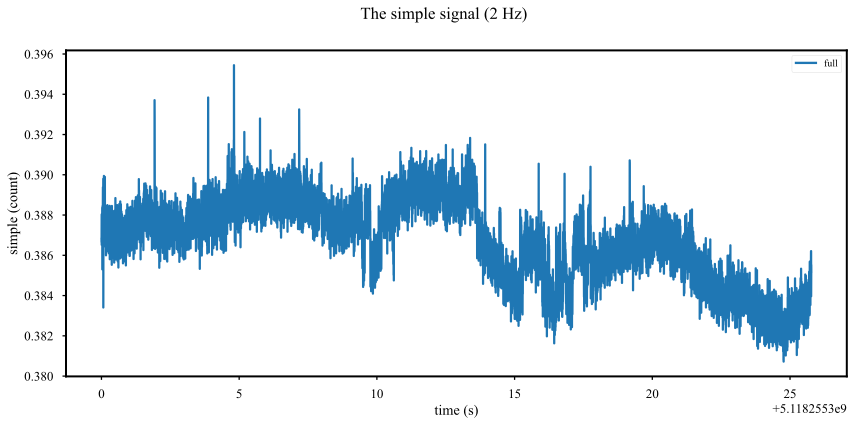

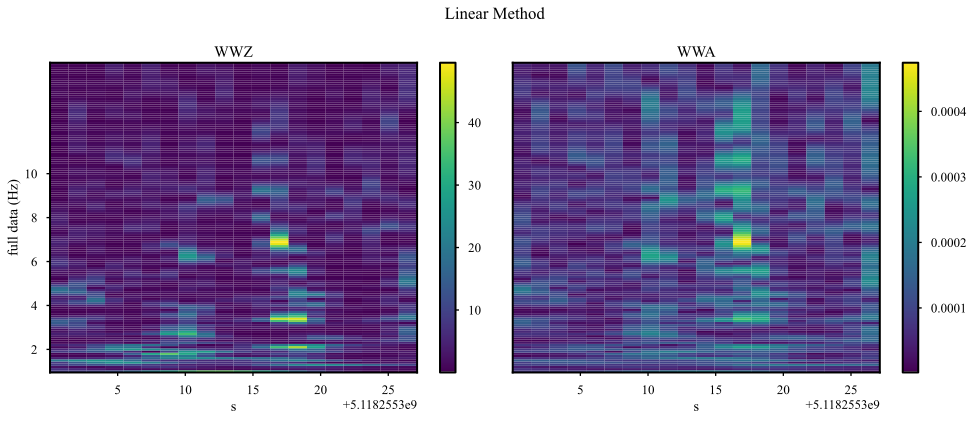

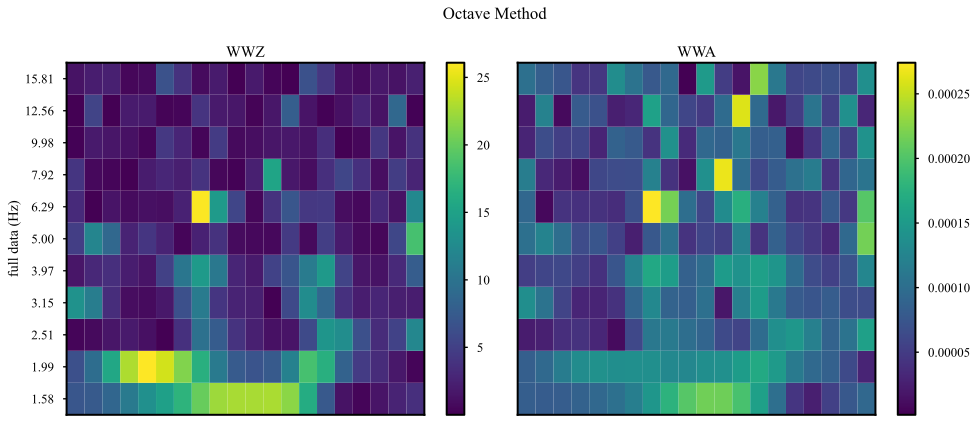

In [121]:
# Plot
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams.update({'font.size': 14})

# Plot of base functions
plt.figure(0)
plt.plot(timestamp, simple_signal, '-')
#plt.plot(timestamp_removed, simple_removed, 'o')
plt.ylabel("simple (count)")
plt.legend(['full', 'removed'], loc=1, fontsize=10)
plt.xlabel("time (s)")
plt.suptitle('The simple signal (2 Hz)')

# Plot of WWZ for simple and simple removed
# 'linear'
fig, ax = plt.subplots(nrows=1, ncols=2)
wwz_plot.linear_plotter(#ax=ax[0, 0],
                        ax=ax[0],
                        TAU=WWZ_simple_linear[0],
                        FREQ=WWZ_simple_linear[1],
                        DATA=WWZ_simple_linear[2])
ax[0].set_ylabel('full data (Hz)')
#ax[0].set_xticks([])
#ax[0].set_yticks([1, 2, 3, 4, 5])
ax[0].set_yticks([2, 4, 6, 8, 10])
ax[0].set_title('WWZ')
ax[0].set_xlabel('s')

# Plot of WWA for the same signal
wwz_plot.linear_plotter(#ax=ax[0, 1],
                        ax=ax[1],
                        TAU=WWZ_simple_linear[0],
                        FREQ=WWZ_simple_linear[1],
                        DATA=WWZ_simple_linear[3])
ax[1].set_title('WWA')
#ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('s')

plt.suptitle('Linear Method')
plt.tight_layout()

# 'octave
fig, ax = plt.subplots(nrows=1, ncols=2)
wwz_plot.octave_plotter(#ax=ax[0, 0],
                        ax=ax[0],
                        TAU=WWZ_simple_octave[0],
                        FREQ=WWZ_simple_octave[1],
                        DATA=WWZ_simple_octave[2],
                        band_order=band_order,
                        log_scale_base=log_scale_base)
ax[0].set_ylabel('full data (Hz)')
ax[0].set_xticks([])
ax[0].set_title('WWZ')



# Plot of WWA for the same signal
wwz_plot.octave_plotter(#ax=ax[0, 1],
                        ax=ax[1],
                        TAU=WWZ_simple_octave[0],
                        FREQ=WWZ_simple_octave[1],
                        DATA=WWZ_simple_octave[3],
                        band_order=band_order,
                        log_scale_base=log_scale_base)
ax[1].set_title('WWA')
ax[1].set_xticks([])
ax[1].set_yticks([])


plt.suptitle('Octave Method')
plt.tight_layout()

plt.show()

In [124]:
"""
This module provides examples demonstrating the WWZ by looking at a simple signal (2 Hz).

Please select whether to run in parallel or not.
There are 'linear' method and 'octave' method.
current example showcases both methods

NOTE: The WWZ shows better information on frequency and WWA shows better information on amplitude.
"""

import time

# noinspection Mypy
import matplotlib.pyplot as plt
# noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot

# Select Mode...
parallel = True

# number of time
ntau = 20  # Creates new time with this many divisions.

# linear
freq_low = 1.0
freq_high = 15
freq_steps = 0.1  # Resolution of frequency steps
freq_lin = [freq_low, freq_high, freq_steps]

# octave
freq_target = 5
freq_low = 1.0
freq_high = 15
band_order = 3
log_scale_base = 10**(3/10)
override = False
freq_oct = [freq_target, freq_low, freq_high, band_order, log_scale_base, override]

# decay constant  (c < 0.02) where c = 1/(2*w^2)
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 5
w = 2 * np.pi * f
c = 1/(2*w**2)

# Code to remove data points at random

def remove_fraction_with_seed(data, fraction, seed=np.random.randint(1)):
    """
    removes fraction of data at random with given seed.
    :param data: data to remove
    :param fraction: fraction to remove
    :param seed: seed for randomness
    :return: data with fraction removed
    """
    n_to_remove = int(len(data) * fraction)
    np.random.seed(seed)

    return np.delete(data, np.random.choice(np.arange(len(data)), n_to_remove, replace=False))


def run_examples() -> None:
    """
    An example of WWZ/WWA using a sine function time series with missing data will be shown.
    """

    # Set timestamps
    #sample_freq = 80
    #timestamp = np.arange(0, 60, 1 / sample_freq)

    # Create simple signal (2hz)
    #sine_2hz = np.sin(timestamp * 2 * (2 * np.pi))
    #simple_signal = sine_2hz

    
    timestamp= np.array(GRS1915_FAST_QPO_data['s'][:2**16])
    simple_signal= np.array(GRS1915_FAST_QPO_data['flux'][:2**16])
    
    
    
    # Get the WWZ/WWA of the signals (linear)
    # 'linear'
    starttime = time.time()
    WWZ_simple_linear = wwz.wwt(timestamp, simple_signal, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_linear)')
    
    # 'octave'
    WWZ_simple_octave = wwz.wwt(timestamp, simple_signal, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_octave)')
    
    return timestamp,simple_signal,WWZ_simple_linear,WWZ_simple_octave



timestamp,simple_signal,WWZ_simple_linear,WWZ_simple_octave=run_examples()

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  635.886
largest tau window is  5.425
26.07 seconds has passed to complete Weighted Wavelet Z-transform 

26.07 seconds has passed (finished WWZ_simple_linear)
*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  635.886
largest tau window is  5.425
4.17 seconds has passed to complete Weighted Wavelet Z-transform 

30.24 seconds has passed (finished WWZ_simple_octave)


In [123]:
len(GRS1915_FAST_QPO_data)

3431565

In [125]:
2**16

65536

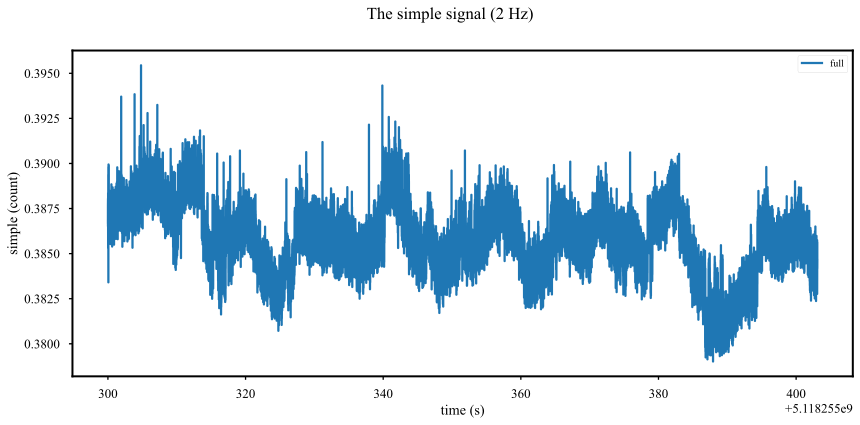

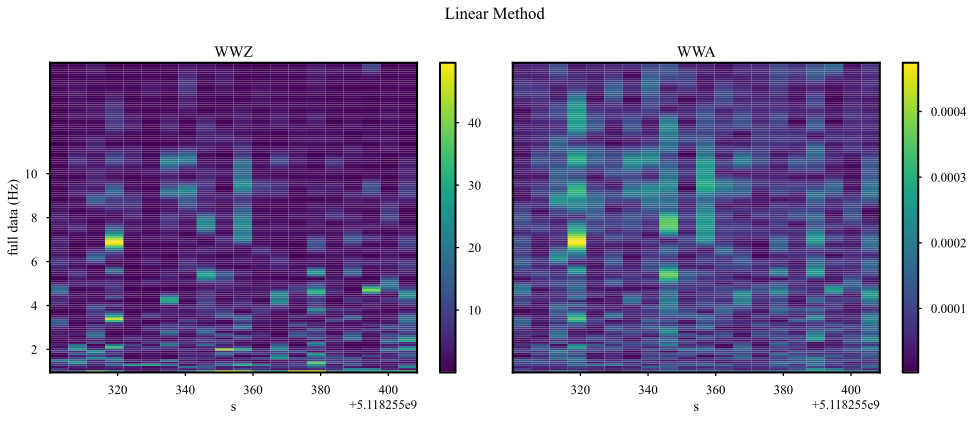

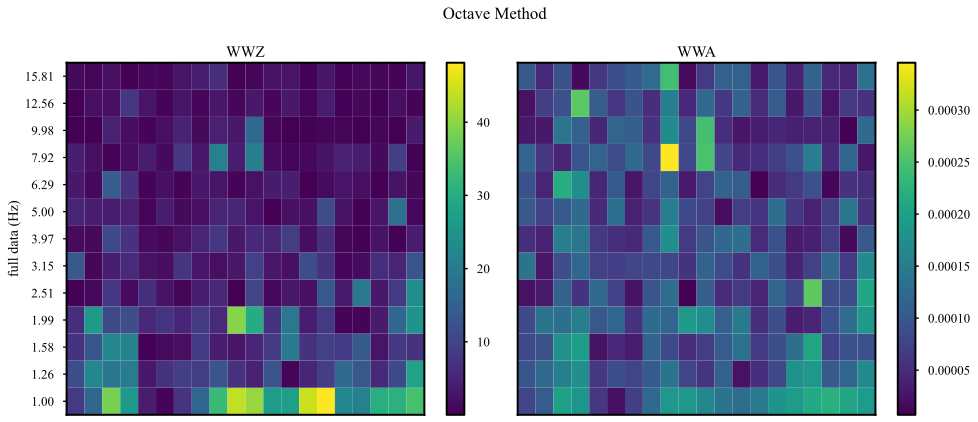

In [126]:
# Plot
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams.update({'font.size': 14})

# Plot of base functions
plt.figure(0)
plt.plot(timestamp, simple_signal, '-')
#plt.plot(timestamp_removed, simple_removed, 'o')
plt.ylabel("simple (count)")
plt.legend(['full', 'removed'], loc=1, fontsize=10)
plt.xlabel("time (s)")
plt.suptitle('The simple signal (2 Hz)')

# Plot of WWZ for simple and simple removed
# 'linear'
fig, ax = plt.subplots(nrows=1, ncols=2)
wwz_plot.linear_plotter(#ax=ax[0, 0],
                        ax=ax[0],
                        TAU=WWZ_simple_linear[0],
                        FREQ=WWZ_simple_linear[1],
                        DATA=WWZ_simple_linear[2])
ax[0].set_ylabel('full data (Hz)')
#ax[0].set_xticks([])
#ax[0].set_yticks([1, 2, 3, 4, 5])
ax[0].set_yticks([2, 4, 6, 8, 10])
ax[0].set_title('WWZ')
ax[0].set_xlabel('s')

# Plot of WWA for the same signal
wwz_plot.linear_plotter(#ax=ax[0, 1],
                        ax=ax[1],
                        TAU=WWZ_simple_linear[0],
                        FREQ=WWZ_simple_linear[1],
                        DATA=WWZ_simple_linear[3])
ax[1].set_title('WWA')
#ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('s')

plt.suptitle('Linear Method')
plt.tight_layout()

# 'octave
fig, ax = plt.subplots(nrows=1, ncols=2)
wwz_plot.octave_plotter(#ax=ax[0, 0],
                        ax=ax[0],
                        TAU=WWZ_simple_octave[0],
                        FREQ=WWZ_simple_octave[1],
                        DATA=WWZ_simple_octave[2],
                        band_order=band_order,
                        log_scale_base=log_scale_base)
ax[0].set_ylabel('full data (Hz)')
ax[0].set_xticks([])
ax[0].set_title('WWZ')



# Plot of WWA for the same signal
wwz_plot.octave_plotter(#ax=ax[0, 1],
                        ax=ax[1],
                        TAU=WWZ_simple_octave[0],
                        FREQ=WWZ_simple_octave[1],
                        DATA=WWZ_simple_octave[3],
                        band_order=band_order,
                        log_scale_base=log_scale_base)
ax[1].set_title('WWA')
ax[1].set_xticks([])
ax[1].set_yticks([])


plt.suptitle('Octave Method')
plt.tight_layout()

plt.show()

## linjie

In [16]:
import numpy as np
import os
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot
#from PlotWorks.FigConfigure import LEFT,RIGHT,TOP,BOTTOM
import matplotlib.pyplot as plt
#from .GATSPYmission import get_frequency_from_LombScargle
#from Tools.ReadAndSave import saveDict,readDict
from scipy.optimize import leastsq

class wwz_go(object):
    def __init__(self,datadir_root,file_path):
        self._readfile(file_path)
        self.base_name=os.path.basename(file_path).replace('.csv','')
        self.datadir_root=datadir_root
        
        self.wwz_save_path='{}/SAVE/{}_wwz.save'.format(datadir_root,self.base_name)

        self.peaks_save_path='{}/SAVE/{}_peaks.save'.format(datadir_root,self.base_name)
        self.peaks_txt_path='{}/SAVE/{}_peaks.txt'.format(datadir_root,self.base_name)

    def _readfile(self, filepath):
        #time, magnitude, magnitude_error= np.loadtxt(filepath,dtype=float,unpack=True)
        data=pd.read_csv(filepath,header=None)      
        data.columns=['mjd','flux','err']
        data=data[:2**12]
        time, magnitude, magnitude_error= data['mjd'],data['flux'],data['err']
        
        self.time,self.magnitude,self.magnitude_error=time,magnitude,magnitude_error

    def freq_estimate(self,f_width=0.003,f_resolution=0.0001):
        f=get_frequency_from_LombScargle(self.time,self.magnitude,mag_err=self.magnitude_error )
        f_lin=[f-f_width,f+f_width,f_resolution]
        print('The freq lin is estimated to {}'.format(f_lin))
        return f_lin

    def compute(self,freq_lin,time_scale, ntau=100):
        self.ts=time_scale
        c=self.get_c(time_scale,freq_lin)
        print('The decay constant is set to {} when time scale is {} days.'.format(c,time_scale))
        print(self.magnitude)
        WWZ_results = wwz.wwt(self.time, self.magnitude, ntau,freq_lin, c,'linear'  )
        self.taus=WWZ_results[0]
        self.freqs=WWZ_results[1]
        self.wwz=WWZ_results[2]

        self.freq_1D=self.freqs[0,:]
        self.tau_1D=self.taus[:,0]

        saveDict({'taus_2D':self.taus,'freqs_2D':self.freqs,
                  'wwz':self.wwz,
                  'freqs_1D':self.freq_1D,
                  'tau_1D':self.tau_1D},self.wwz_save_path)

    def normalization(self):
        for i in range(self.wwz.shape[0]):
            self.wwz[i,:]=10**(self.wwz[i,:]/self.wwz[i,:].max())

    def normalization_log(self):
        for i in range(self.wwz.shape[0]):
            self.wwz[i,:]=self.wwz[i,:]/self.wwz[i,:].max()

    def get_maxPower_freqs(self,save=True):
        maxPower_freqs=[]

        print(self.wwz.shape[0])
        for i in range(self.wwz.shape[0]):
            maxindex=(self.wwz[i,:]).argmax()

            maxPower_freqs.append(self.freq_1D[maxindex]  )

        print(len(maxPower_freqs))
        self.maxPower_freqs=np.array(maxPower_freqs)

        if save:
            saveDict({'freqs':self.maxPower_freqs,'tau':self.tau_1D},self.peaks_save_path)

            output_data=np.array(list(zip(self.tau_1D,self.maxPower_freqs)))
            np.savetxt(self.peaks_txt_path,output_data,fmt='%.6f')


        return self.maxPower_freqs

    def get_c(self,tau,freq_lin):
        freq_c=(freq_lin[0]+freq_lin[1])/2.
        omega=2*np.pi*freq_c

        return 1./omega**2/(tau/2.)**2

    def plot_append_wwz_map(self,ax,color_bar=True):
        wwz_plot.linear_plotter(ax,TAU=self.taus, FREQ=self.freqs, DATA=self.wwz,color_bar=color_bar)

    def plot_wwz_temp(self):
        figsize = (5, 4)
        plt.figure(1, figsize)
        plt.subplots_adjust(hspace=0.0001, left=(LEFT+0.05) / figsize[0], right=1 - RIGHT / figsize[0],
                            bottom=BOTTOM / figsize[1], top=1 - TOP / figsize[1])
        ax=plt.gca()
        self.plot_append_wwz_map(ax)

        save_fig_path='{}/WWZ_FIG/{}_ts{:.0f}_wwz.png'.format(self.datadir_root,self.base_name,self.ts)
        plt.savefig(save_fig_path)
        plt.close()

    def plot_wwz_temp_with_hist(self):
        figsize = (5, 7)
        fig, axs = plt.subplots(2, 1, sharex=True,figsize=figsize)
        plt.subplots_adjust(hspace=0.0001, left=(LEFT+0.05) / figsize[0], right=1 - RIGHT / figsize[0],
                            bottom=BOTTOM / figsize[1], top=1 - TOP / figsize[1])

        axs[0].hist(self.time,range=[ self.tau_1D.min(),self.tau_1D.max()+self.tau_1D[1]-self.tau_1D[0] ],bins=len(self.tau_1D),
                    rwidth=0.8,color='grey',alpha=0.7,)
        self.plot_append_wwz_map(axs[1],color_bar=False)


        save_fig_path='{}/WWX_HIST_FIG/{}_ts{:.0f}_wwzhist.png'.format(self.datadir_root,self.base_name,self.ts)
        plt.savefig(save_fig_path)
        plt.close()

    def plot_peak_temp(self):
        assert hasattr(self,'maxPower_freqs'),'Cannot find maxPower_freqs for self.'
        figsize = (5, 4)
        plt.figure(1, figsize)
        plt.subplots_adjust(hspace=0.0001, left=(LEFT+0.05) / figsize[0], right=1 - RIGHT / figsize[0],
                            bottom=BOTTOM / figsize[1], top=1 - TOP / figsize[1])
        ax=plt.gca()
        ax.scatter( self.tau_1D,self.maxPower_freqs,s=10 )
        save_fig_path='{}/Peak_FIG/{}_ts{:.0f}_peaks.png'.format(self.datadir_root,self.base_name,self.ts)
        plt.savefig(save_fig_path)
        plt.close()

    def get_orbital_motion_model(self):
        def get_circle(r,phase,period_orb):
            def circle(t):
                return ellipse_V_sight(t,r,0,phase,period_orb,0)

            return circle

        c=300000. #km/s
        def cal_freqs(freq,sight_v):
            return freq*c/(c+sight_v)


        bjd=np.linspace(self.time.min(),self.time.max(),2000 )
        def the_model(pars,times):
            ORBITAL_PERIOD=pars[0]
            ORBITAL_RADIUS=pars[1]*100000000
            ORBITAL_PHASE=pars[2]
            freq0=pars[3]
            DECAY_RATE=pars[4]

            circle=get_circle(ORBITAL_RADIUS,ORBITAL_PHASE,ORBITAL_PERIOD)
            sight_v=circle(bjd)
            intric_freq=freq0+(bjd-8000)*DECAY_RATE

            sight_v=circle(times)
            print(sight_v.max()-sight_v.min())
            intric_freq=freq0+(times-8000)*DECAY_RATE
            freqs=cal_freqs(intric_freq,sight_v)

            return freqs

        def the_model2(pars,times):
            ORBITAL_PERIOD1=pars[0]
            ORBITAL_RADIUS1=pars[1]*100000000
            ORBITAL_PHASE1=pars[2]
            ORBITAL_PERIOD2=pars[3]
            ORBITAL_RADIUS2=pars[4]*100000000
            ORBITAL_PHASE2=pars[5]
            freq0=pars[6]
            DECAY_RATE=pars[7]

            circle1=get_circle(ORBITAL_RADIUS1,ORBITAL_PHASE1,ORBITAL_PERIOD1)
            circle2=get_circle(ORBITAL_RADIUS2,ORBITAL_PHASE2,ORBITAL_PERIOD2)
            sight_v=circle1(bjd)+circle2(bjd)
            intric_freq=freq0

            sight_v=circle1(times)+circle2(times)
            print(sight_v.max()-sight_v.min())
            intric_freq=freq0+(times-8000)*DECAY_RATE
            freqs=cal_freqs(intric_freq,sight_v)

            return freqs


        return the_model2



    def peaks_fit(self,datadir_root,load=True):
        if load:
            save_data=readDict(self.peaks_save_path)
            maxPower_freqs=save_data['freqs']
            taus=save_data['tau']
        else:
            raise ValueError


        orbital_motion_model=self.get_orbital_motion_model()

        res = lambda pars, y, *args: (y - orbital_motion_model(pars, *args))

        #p0 = [1200,2.,-0.5,7.60590062e+01,1.00000000e-8] # points is enough
        p0 = [1500,2.,-0.5,400,2.,-0.5,7.60590062e+01,1.00000000e-8]

        pars, success = leastsq(res, p0, args=( maxPower_freqs,taus))

        print(pars)

        model_freqs=orbital_motion_model(pars,taus)



        figsize = (5, 4)
        plt.figure(1, figsize)
        plt.subplots_adjust(hspace=0.0001, left=(LEFT+0.05) / figsize[0], right=1 - RIGHT / figsize[0],
                            bottom=BOTTOM / figsize[1], top=1 - TOP / figsize[1])
        ax=plt.gca()
        ax.scatter( taus,maxPower_freqs,s=7 )

        ax.plot(taus,model_freqs)

        save_fig_path='{}/fit/{}_peaks.png'.format(self.datadir_root,self.base_name)

        plt.savefig(save_fig_path)
        plt.close()


ModuleNotFoundError: No module named 'Tools'

In [ ]:
data_table_c

In [13]:
datadir_root,file_path

('/Users/lyubing/Downloads/GRS1915',
 '/Users/lyubing/Downloads/GRS1915/lightcurvedata—GRS1915.csv')

In [14]:
wwz_go(datadir_root,file_path)

NameError: name 'wwz_go' is not defined

In [ ]:
1/5

In [ ]:
1./24./60./60.*0.01,1./24./60./60.*1

In [ ]:
2**10

In [ ]:
0.2/3600/24

In [ ]:
data_QPO=GRS1915_FAST_QPO_data[:2**12]

timestamp=data_QPO['mjd']
#simple_signal=data_QPO['flux']
magnitude=data_QPO['flux']
magnitude_error=data_QPO['err']
ntau=len(data_QPO['mjd'])

f_lin=freq_estimate(timestamp,magnitude,magnitude_error,f_width=30)

In [ ]:
1/(1/124019.0234708401*24*3600),1/(1/124079.0234708401*24*3600)